In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


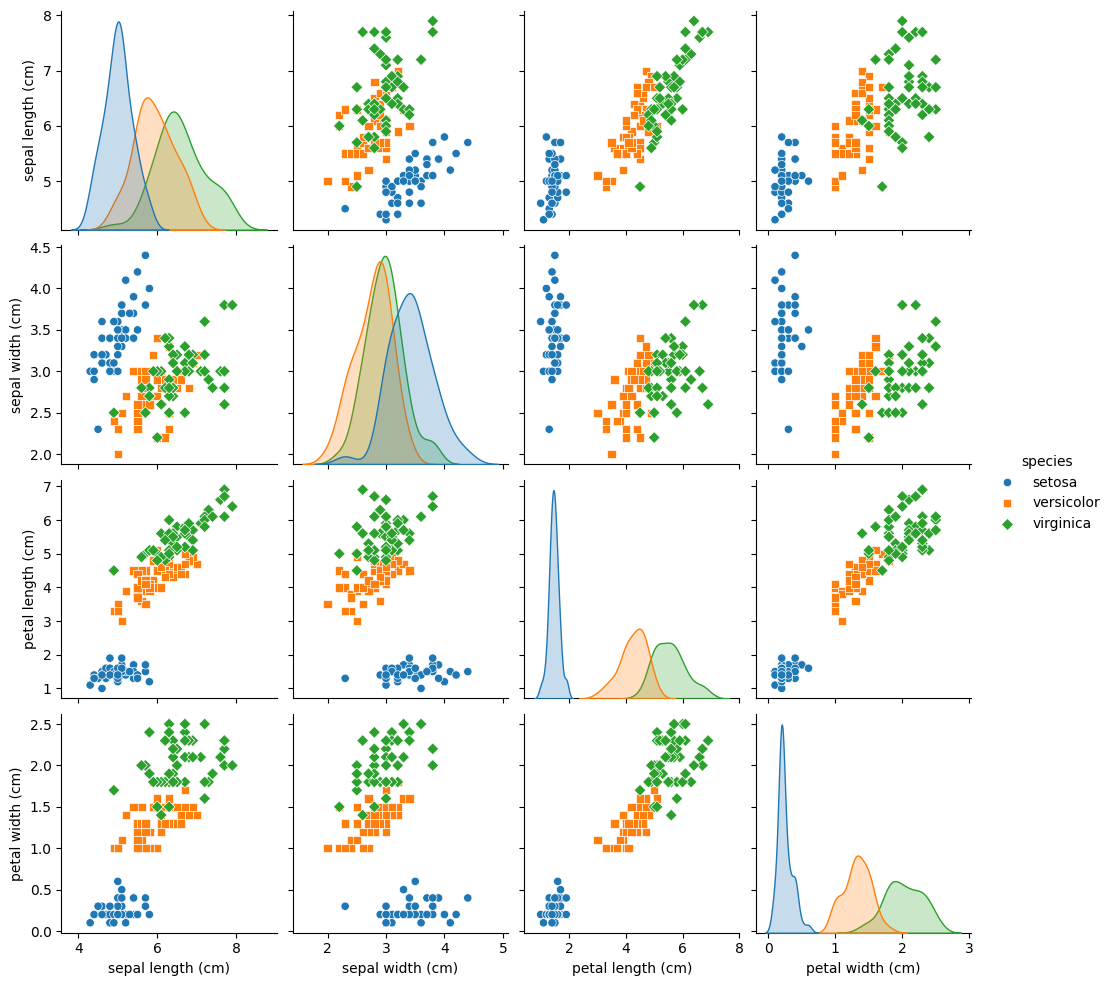

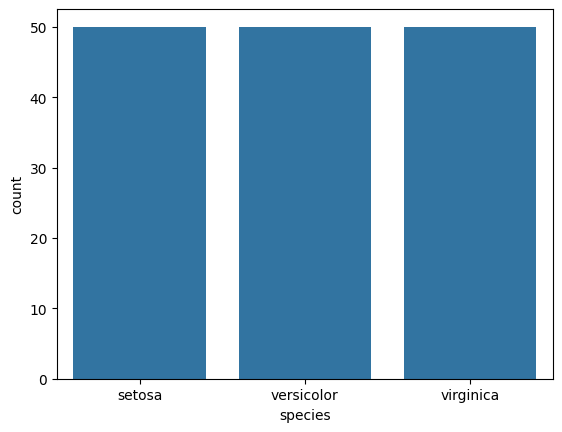

In [3]:
# Criando um pairplot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

# Visualizando a distribuição das espécies
sns.countplot(x='species', data=df)
plt.show()

In [4]:
# características (X) / classes (y)
X = iris.data
y = iris.target

# Dividindo o dataset: 70% treino / 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 105
Tamanho do conjunto de teste: 45


In [5]:
# Criando o modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Exibindo a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Acurácia do modelo: 100.00%


In [6]:
# relatório de classificação
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



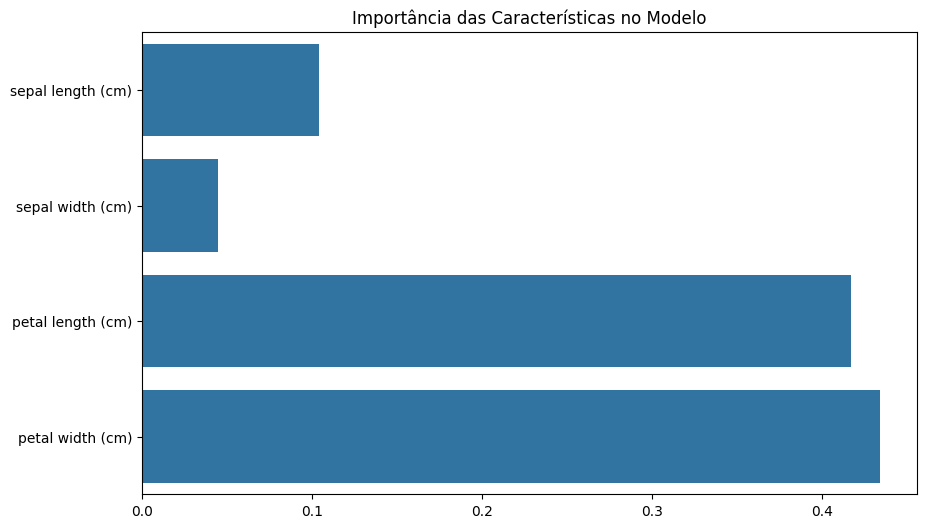

In [7]:
# Exibindo a importância das características
feature_importances = model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Importância das Características no Modelo")
plt.show()